# Olist A/B Testing (Simulation)

В нашем датасете нет реального эксперимента, поэтому рассмотрим симуляцию А/Б теста.

**Цель этапа** — оценить влияние опоздания доставки на пользовательскую оценку заказа.

## Метрика 1 - Avg review score
H0: Средняя оценка заказов с опозданием доставки не отличается от средней оценки заказов без опоздания.

Н1: Заказы с опозданием доставки имеют более низкую среднюю оценку по сравнению с заказами без опоздания.

α = 0.05

## Формирование групп

Группа А  - заказы без опоздания доставки

Группа В  - заказы с опозданием доставки

In [14]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
orders_features = pd.read_csv('../data/orders_features.csv', sep=';')

In [3]:
df_delivered = orders_features[
    (orders_features['order_status'] == 'delivered') &
    (orders_features['delivery_days'].notna())
]

In [52]:
group_A = df_delivered.query('is_late_delivery == 0 and has_review ==1')['avg_review_score']

group_B = df_delivered.query('is_late_delivery == 1 and has_review ==1')['avg_review_score']

In [35]:
group_A_df = df_delivered.query('is_late_delivery == 0 and has_review ==1')[['avg_review_score']]

group_B_df = df_delivered.query('is_late_delivery == 1 and has_review ==1')[['avg_review_score']]

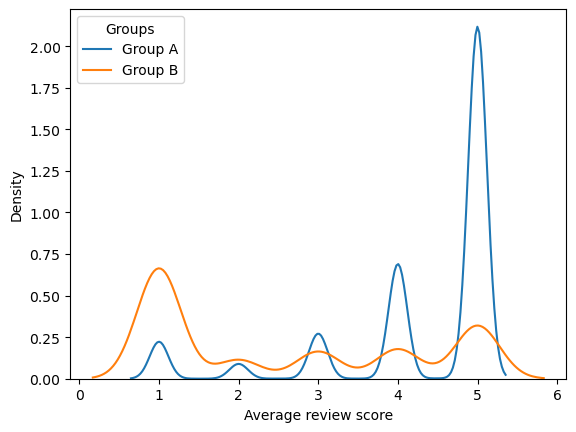

In [71]:
sns.kdeplot(group_A_df['avg_review_score'], fill=False, label="Group A")
sns.kdeplot(group_B_df['avg_review_score'], fill=False, label="Group B")

plt.legend(title="Groups")
plt.xlabel("Average review score")
plt.ylabel("Density")
plt.show()

Распределение пользовательских оценок не является нормальным и имеет дискретный характер (шкала от 1 до 5), а также содержит выбросы. В силу этих особенностей данных и учитывая, что анализ проводится на симулированных (наблюдательных) данных, для сравнения двух независимых групп был выбран непараметрический критерий Манна–Уитни.

In [53]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(group_A, group_B, alternative='two-sided')

stat, p_value

(np.float64(524735917.5), np.float64(0.0))

По результатам теста получено значение p-value = 0. При уровне значимости 0.05 нулевая гипотеза отвергается. Таким образом, мы делаем вывод о том, что средняя оценка заказов с опозданием доставки ниже средней оценки заказов без опоздания

In [54]:
group_A.median() - group_B.median()

3.0

Медианная оценка заказов без опоздания доставки превышает медианную оценку заказов с опозданием на 3 балла.

Результаты A/B теста свидетельствуют о том, что опоздание доставки оказывает статистически значимое негативное влияние на пользовательскую оценку заказа.*


Снижение доли заказов с опозданием доставки потенциально может привести к росту пользовательских оценок и улучшению клиентского опыта.

**Отметим, что анализ основан на наблюдательных данных, а не на результатах реального эксперимента.*

## Метрика 2 - Bad review rate

Н0: Доля негативных отзывов у заказов с опозданием не отличается от доли негативных отзывов заказов без опоздания доставки.

Н1: Доля негативных отзывов у заказов с опозданием отличается от доли негативных отзывов заказов без опоздания доставки.

In [76]:
bad_rate_A = (
    (df_delivered[(df_delivered['is_late_delivery'] == 0) & (df_delivered['avg_review_score'] <= 2)].shape[0])
    / df_delivered[df_delivered['is_late_delivery'] == 0].shape[0]
)

bad_rate_B = (
    (df_delivered[(df_delivered['is_late_delivery'] == 1) & (df_delivered['avg_review_score'] <= 2)].shape[0])
    / df_delivered[df_delivered['is_late_delivery'] == 1].shape[0]
)


Так как данная метрика бинарная, воспользуемся описательным методом (сравнение долей), без теста.

In [77]:
bad_rate_A

0.09137674292676323

In [78]:
bad_rate_B

0.5284947610529006

Доля негативных отзывов среди заказов с опозданием значительно выше, чем среди заказов, доставленных вовремя.  Это подтверждает негативное влияние задержек доставки на риск плохого
  пользовательского опыта.

## Метрика 3 - Average Order Value

Average Order Value (AOV) — средняя стоимость заказа,
рассчитанная как сумма стоимости товаров и стоимости доставки.

H0: Распределение стоимости заказа не отличается между заказами,
доставленными вовремя и с опозданием.


H1: Заказы с опозданием доставки имеют меньшую стоимость
по сравнению с заказами, доставленными вовремя.

In [82]:
df_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,items_count,total_price,total_freight,max_payment_installments,total_payment_value,avg_review_score,reviews_count,delivery_days,total_amount_olist,has_review,is_late_delivery,shipping_cost_share
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,1.0,29.99,8.72,1.0,38.71,4.0,1.0,8.0,38.71,1,0,0.225265
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,2018-08-07 15:27:45,1.0,118.70,22.76,1.0,141.46,4.0,1.0,14.0,141.46,1,0,0.160894
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,2018-08-17 18:06:29,1.0,159.90,19.22,3.0,179.12,5.0,1.0,9.0,179.12,1,0,0.107302
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,2017-12-02 00:28:42,1.0,45.00,27.20,1.0,72.20,5.0,1.0,13.0,72.20,1,0,0.376731
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,2018-02-16 18:17:02,1.0,19.90,8.72,1.0,28.62,5.0,1.0,3.0,28.62,1,0,0.304682


In [99]:
# AOV
group_not_late = df_delivered[df_delivered['is_late_delivery'] == 0]
group_late = df_delivered[df_delivered['is_late_delivery'] == 1]

print(group_not_late['total_payment_value'].median())
print(group_late['total_payment_value'].median())

104.62
112.27


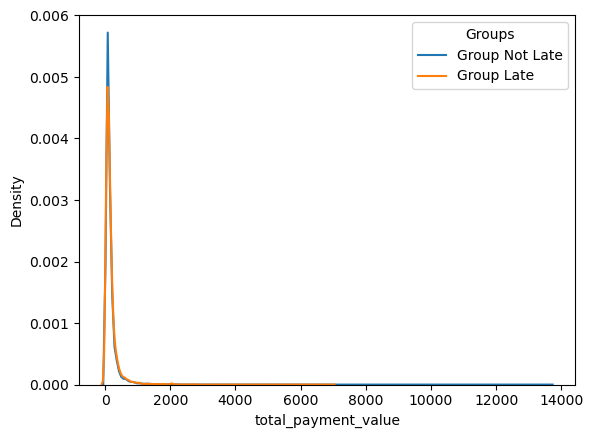

In [100]:
sns.kdeplot(group_not_late['total_payment_value'], fill=False, label="Group Not Late")
sns.kdeplot(group_late['total_payment_value'], fill=False, label="Group Late")

plt.legend(title="Groups")
plt.show()

In [95]:
group_not_late['total_payment_value'].isna().sum()

np.int64(0)

In [96]:
group_late['total_payment_value'].isna().sum()

np.int64(1)

In [97]:
from scipy.stats import mannwhitneyu

y = group_late['total_payment_value'].dropna()


stat, p_value = mannwhitneyu(
    group_not_late['total_payment_value'],
    y,
    alternative='two-sided',
    method='asymptotic'
)

stat, p_value

(np.float64(328883998.0), np.float64(3.070850752108624e-14))

Результаты теста Манна–Уитни показали наличие статистически значимых
различий в распределении стоимости заказов между группами (p-value < 0.05).

При этом медианная стоимость заказов, доставленных с опозданием, оказалась выше, чем у заказов, доставленных вовремя.
Таким образом, альтернативная гипотеза о более низкой стоимости заказов с опозданием не подтвердилась.

Опоздания чаще происходят у более дорогих и логистически сложных заказов.
Это усиливает негативный пользовательский опыт именно там, где стоимость ошибки выше.

## Финальный вывод

Результаты A/B теста показывают, что опоздание доставки оказывает явное негативное влияние на пользовательский опыт:

- Заказы с опозданием имеют статистически значимо более низкие оценки.
- Доля негативных отзывов среди заказов с опозданием выше.
- Эти выводы подтверждают необходимость соблюдения сроков доставки для поддержания удовлетворённости клиентов.